# COOLING LOAD CALCULATION OF A TWO-ZONE BUILDING
---

The model of the two-zone building is represented by a class programmed in a separated module `building.py` which is in the same directory of this notebook and is imported below. To instantiate the building model, the geographic location of the building, the climatic design information needed to perform the cooling load calculation, and the indoor air design temperature must be specified first and can then be passed into the constructor of the `TwoZoneBuilding` class. 

In [1]:
from hvac import Quantity
from hvac.sun import Location, ClimateType, ReferenceDates
from hvac.cooling_load_calc import WeatherData
from building import TwoZoneBuilding

In [2]:
Q_ = Quantity

## Building Model

### Geographic Location

In [3]:
location = Location(
    fi=Q_(51.183, 'deg'),
    L_loc=Q_(3.8, 'deg'),
    altitude=Q_(8, 'm'),
    climate_type=ClimateType.MID_LATITUDE_SUMMER,
    timezone='Etc/GMT-1'
)

### Design Day & Climatic Design Information

In [4]:
wd = WeatherData.create_from_climatic_design_data(
    location,
    date=ReferenceDates.get_date_for('Jul'),
    T_db_des=Q_(26.7, 'degC'),
    T_db_rng=Q_(11.3, 'K'),
    T_wb_mc=Q_(19.2, 'degC'),
    T_wb_rng=Q_(4.7, 'K')
)

### Building Model Instantiation

In [5]:
bm = TwoZoneBuilding(wd, T_int_des=Q_(24, 'degC'))

## Design Day Heat Gains & Cooling Loads

### Building

In [6]:
df_building = bm.cooling_load()
df_building

,Q_dot_cnd,Q_dot_sol,Q_dot_sen_vent,Q_dot_sen_ihg,Q_dot_tsn,Q_dot_sen_zone,Q_dot_lat_vent,Q_dot_lat_ihg,Q_dot_lat_zone,Q_dot_zone
0,243.076955,0.000000,-290.649847,0.0000,680.440780,511.287534,423.618691,0.0,423.618691,934.906224
1,139.050774,0.000000,-320.662122,0.0000,583.620241,327.272260,449.474714,0.0,449.474714,776.746975
2,36.477409,0.000000,-340.670305,0.0000,495.297982,162.879986,466.348642,0.0,466.348642,629.228629
3,-65.126615,0.000000,-355.676442,0.0000,414.014462,11.219996,478.819173,0.0,478.819173,490.039169
4,-167.345937,418.834894,-370.682580,0.0000,365.209969,61.722934,491.135010,0.0,491.135010,552.857943
5,-260.911809,1030.088647,-380.686671,0.0000,361.456977,284.197062,499.261293,0.0,499.261293,783.458355
6,-325.011443,1875.695770,-370.682580,0.0000,419.647571,684.655153,491.135010,0.0,491.135010,1175.790163
7,-350.007901,2563.953004,-335.668259,0.0000,529.873765,1121.365770,462.156832,0.0,462.156832,1583.522602
8,-302.469892,2990.304243,-250.633481,1025.4845,716.548342,2213.247764,388.081892,450.0,838.081892,3051.329657
9,-224.483139,3314.866233,-155.594610,1025.4845,920.065813,2782.834554,298.426560,450.0,748.426560,3531.261114


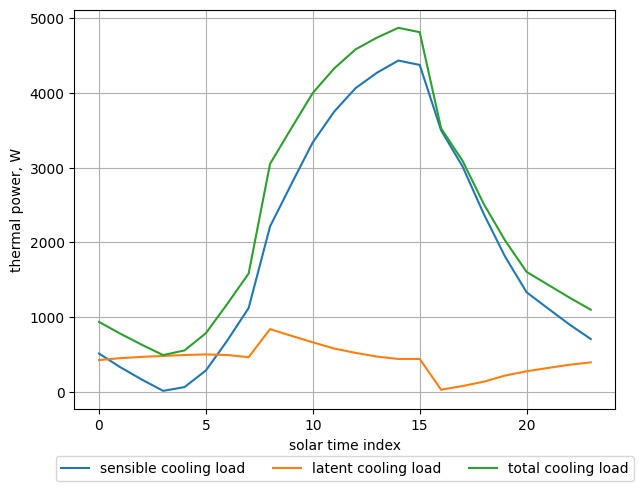

In [7]:
chart_building = bm.plot_cooling_load(df_building)
chart_building.show()

### Zone 1 (west)

In [8]:
df_z1 = bm.zone_1.cooling_load()
df_z1

,Q_dot_cnd,Q_dot_sol,Q_dot_sen_vent,Q_dot_sen_ihg,Q_dot_tsn,Q_dot_sen_zone,Q_dot_lat_vent,Q_dot_lat_ihg,Q_dot_lat_zone,Q_dot_zone
0,160.743192,0.000000,-145.324923,0.00000,375.885879,312.479801,211.809345,0.0,211.809345,524.289146
1,109.547920,0.000000,-160.331061,0.00000,324.514980,217.953158,224.737357,0.0,224.737357,442.690515
2,56.877481,0.000000,-170.335152,0.00000,277.872959,132.528901,233.174321,0.0,233.174321,365.703222
3,3.368032,0.000000,-177.838221,0.00000,235.025458,53.031148,239.409587,0.0,239.409587,292.440734
4,-51.111458,92.469256,-185.341290,0.00000,199.406720,33.818488,245.567505,0.0,245.567505,279.385993
5,-101.576710,319.203219,-190.343336,0.00000,177.519362,110.736888,249.630647,0.0,249.630647,360.367534
6,-137.640563,526.217561,-185.341290,0.00000,169.690296,207.679700,245.567505,0.0,245.567505,453.247205
7,-154.892056,681.606699,-167.834130,0.00000,173.175274,308.091628,231.078416,0.0,231.078416,539.170044
8,-137.316214,877.548784,-125.316740,512.74225,213.473425,801.520651,194.040946,225.0,419.040946,1220.561598
9,-106.665647,1193.360580,-77.797305,512.74225,275.736051,1114.723970,149.213280,225.0,374.213280,1488.937250


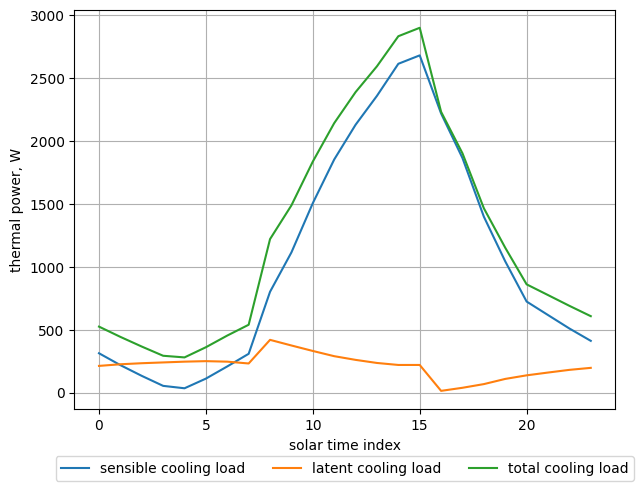

In [9]:
chart_z1 = bm.zone_1.plot_cooling_load(df_z1)
chart_z1.show()

### Zone 2 (east)

In [10]:
df_z2 = bm.zone_2.cooling_load()
df_z2

,Q_dot_cnd,Q_dot_sol,Q_dot_sen_vent,Q_dot_sen_ihg,Q_dot_tsn,Q_dot_sen_zone,Q_dot_lat_vent,Q_dot_lat_ihg,Q_dot_lat_zone,Q_dot_zone
0,82.333763,0.000000,-145.324923,0.00000,304.554902,198.807733,211.809345,0.0,211.809345,410.617078
1,29.502855,0.000000,-160.331061,0.00000,259.105261,109.319103,224.737357,0.0,224.737357,334.056460
2,-20.400072,0.000000,-170.335152,0.00000,217.425023,30.351086,233.174321,0.0,233.174321,263.525407
3,-68.494647,0.000000,-177.838221,0.00000,178.989005,-41.811152,239.409587,0.0,239.409587,197.598435
4,-116.234480,326.365638,-185.341290,0.00000,165.803249,27.904446,245.567505,0.0,245.567505,273.471951
5,-159.335099,710.885427,-190.343336,0.00000,183.937616,173.460174,249.630647,0.0,249.630647,423.090821
6,-187.370880,1349.478210,-185.341290,0.00000,249.957275,476.975453,245.567505,0.0,245.567505,722.542958
7,-195.115845,1882.346305,-167.834130,0.00000,356.698490,813.274142,231.078416,0.0,231.078416,1044.352558
8,-165.153677,2112.755459,-125.316740,512.74225,503.074917,1411.727113,194.040946,225.0,419.040946,1830.768059
9,-117.817492,2121.505653,-77.797305,512.74225,644.329762,1668.110585,149.213280,225.0,374.213280,2042.323865


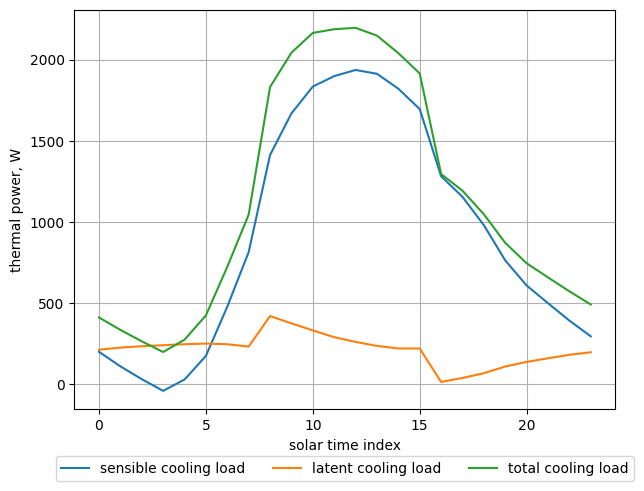

In [11]:
chart_z2 = bm.zone_2.plot_cooling_load(df_z2)
chart_z2.show()